In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's make_blobs method. The make_blobs is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. In our notebook, we can generate and visualize our dummy data using the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

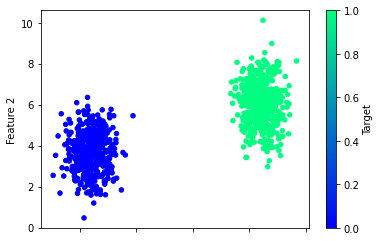

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. To normalize our dummy data, we'll add and run the following code to the notebook:

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model. To do this, we must add the following code to the notebook:

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

The input_dimparameter indicates how many inputs will be in the model (in this case two).
The units parameter indicates how many neurons we want in the hidden layer (in this case one).
The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.
Putting it all together, our first Dense layer should have the following Python code:

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Now that we have our input and hidden layers built, we need to add an output layer:
Once again, we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output. Let's add the following code to our notebooks:

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that we have added our layers to the Sequential model, we can double-check our model structure using the summary method. Try running the following code in your notebook:

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 954us/step - loss: 0.6815 - accuracy: 0.6853
Epoch 2/100
24/24 [==============================] - 0s 955us/step - loss: 0.6770 - accuracy: 0.8440
Epoch 3/100
24/24 [==============================] - 0s 997us/step - loss: 0.6714 - accuracy: 0.6693
Epoch 4/100
24/24 [==============================] - 0s 999us/step - loss: 0.6643 - accuracy: 0.9187
Epoch 5/100
24/24 [==============================] - 0s 999us/step - loss: 0.6560 - accuracy: 0.9427
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.9640
Epoch 7/100
24/24 [==============================] - 0s 997us/step - loss: 0.6355 - accuracy: 0.9773
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.9907
Epoch 9/100
24/24 [==============================] - 0s 954us/step - loss: 0.6102 - accuracy: 0.9947
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.

Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 867us/step - loss: 0.0947 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 824us/step - loss: 0.0931 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 824us/step - loss: 0.0916 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 870us/step - loss: 0.0901 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 954us/step - loss: 0.0886 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 911us/step - loss: 0.0872 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 911us/step - loss: 0.0858 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 867us/step - loss: 0.0844 - a

<AxesSubplot:>

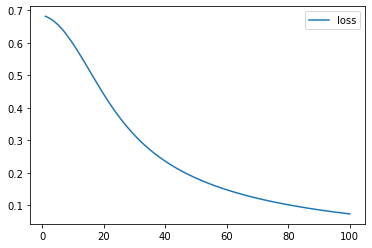

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

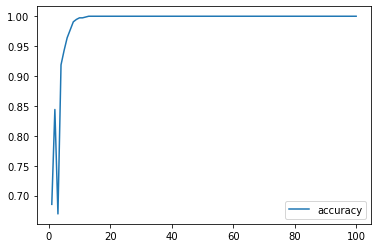

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the evaluate method and print the testing loss and accuracy values. In our notebooks, we'll add and run the following code:

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0751 - accuracy: 1.0000
Loss: 0.07514557242393494, Accuracy: 1.0


In [ ]:
Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. For example, if we wanted to predict the class of a new blob dataset, we can add and run the following code:

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll add and run the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

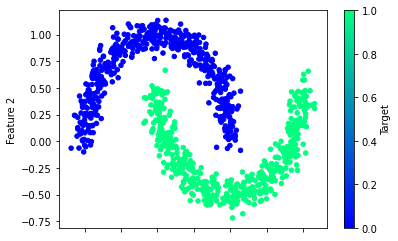

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8565 - accuracy: 0.5680
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7762 - accuracy: 0.5800
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.5960
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6093
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6227
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.6400
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6453
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.6493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.6627
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.6667
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.8840
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8840
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8840
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.8840
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.8840
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8853
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8853
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8867
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.8853
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8853
Epoch 93/100


<AxesSubplot:>

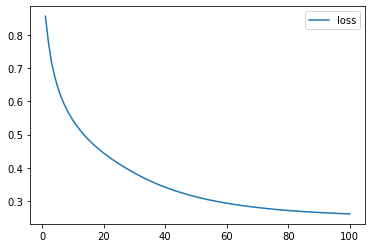

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

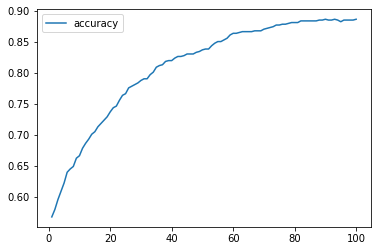

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the Dense class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same. To our notebooks, we'll add and run the following code:

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data. For us to make direct comparisons with our single-neuron model, we'll use the same training parameters, including loss metric, optimizer function, and number of epochs.

Again, we'll add and run the following code to our notebooks:

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 954us/step - loss: 0.6873 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 977us/step - loss: 0.6838 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 962us/step - loss: 0.6792 - accuracy: 0.6840
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.8267
Epoch 6/100
24/24 [==============================] - 0s 956us/step - loss: 0.6661 - accuracy: 0.8267
Epoch 7/100
24/24 [==============================] - 0s 997us/step - loss: 0.6568 - accuracy: 0.8707
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.8747
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.8733
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.8747

24/24 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9027
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 880us/step - loss: 0.2498 - accuracy: 0.9013
Epoch 84/100
24/24 [==============================] - 0s 911us/step - loss: 0.2493 - accuracy: 0.9027
Epoch 85/100
24/24 [==============================] - 0s 910us/step - loss: 0.2483 - accuracy: 0.9013
Epoch 86/100
24/24 [==============================] - 0s 925us/step - loss: 0.2480 - accuracy: 0.9013
Epoch 87/100
24/24 [==============================] - 0s 868us/step - loss: 0.2472 - accuracy: 0.9013
Epoch 88/100
24/24 [==============================] - 0s 895us/step - loss: 0.2461 - accuracy: 0.9013
Epoch 89/100
24/24 [==============================] - 0s 839us/step - loss: 0.2456 - accuracy: 0.9013
Epoch 90/100
24/24 [==============================] - 0s 909us/step - loss: 0.2450 - accuracy: 0.90